In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(
  'ignore'
)

In [2]:
X, y = make_blobs(
  n_samples=1000,
  n_features=5,
  centers=3,
  cluster_std=1.5,
  random_state=42
)

In [3]:
X

array([[-1.42377719, 12.46490126,  6.25302843, -0.8755949 , -6.76198309],
       [-6.94865994, -9.98581568, 10.3664663 ,  3.46001503,  2.51684783],
       [-4.15018632, -7.40943016,  8.03406262,  2.80691874,  6.15775233],
       ...,
       [-3.43536754,  6.14613139,  5.23513684,  4.24494603, -5.72000241],
       [-2.4459965 ,  9.78616961,  6.44683145,  3.25020108, -7.81017277],
       [-4.36592904,  9.80083025,  3.53751321,  1.44200822, -6.19932044]],
      shape=(1000, 5))

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled

array([[ 1.49911724,  1.06602453,  0.03617746, -0.08240525, -0.69770137],
       [-0.19371741, -1.52326883,  2.22000359,  1.00068776,  1.07283159],
       [ 0.66374026, -1.2261283 ,  0.98172936,  0.83753563,  1.76756798],
       ...,
       [ 0.8827621 ,  0.33726612, -0.50422167,  1.19677397, -0.49887663],
       [ 1.18590728,  0.75708018,  0.13906757,  0.94827345, -0.89771088],
       [ 0.59763628,  0.75877103, -1.40549086,  0.49656283, -0.59033733]],
      shape=(1000, 5))

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 1.22586676,  0.9250553 ],
       [-2.73672628, -0.42351551],
       [-2.4124308 ,  0.56333134],
       ...,
       [ 0.38561039,  1.52586837],
       [ 0.76448525,  1.30236895],
       [ 1.22749632,  1.27681379]], shape=(1000, 2))

In [7]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y
df_pca

,PC1,PC2,label
0,1.225867,0.925055,0
1,-2.736726,-0.423516,1
2,-2.412431,0.563331,1
3,0.750955,1.244029,0
4,0.585032,1.581927,0
...,...,...,...
995,1.080205,1.332703,0
996,-2.419000,0.084505,1
997,0.385610,1.525868,0
998,0.764485,1.302369,0


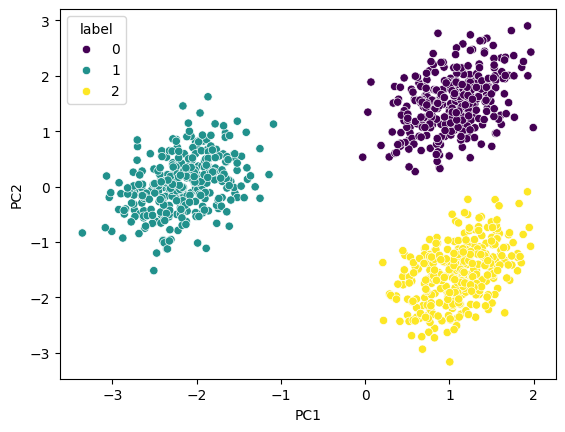

In [9]:
sns.scatterplot(
  data=df_pca,
  x = 'PC1',
  y = 'PC2',
  hue='label',
  palette='viridis'
)
plt.savefig('PCA.png')
plt.show()